In [4]:
json_gt = [json.loads(line) for line in open('label_data_0313_withclasses.json')]
json_gt2 = [json.loads(line) for line in open('label_data_0531_withclasses.json')]
json_gt3 = [json.loads(line) for line in open('label_data_0601_withclasses.json')]

<h2> Definiranje modela za regresiju i klasifikaciju </h2>

In [6]:
def model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    x = BatchNormalization()(input_img)

    x = Conv2D(filters = 16, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 16, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 32, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 64, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 128, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 128, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(filters = 256, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Conv2D(filters = 256, kernel_size = (3,3), strides=(1, 1), padding = 'same', activation = 'relu')(x)
    x = Flatten()(x)

    branch_1 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_2 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_3 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)
    branch_4 = Dense(120, kernel_initializer = glorot_uniform(seed=0), activation = 'relu')(x)

    branch_1 = Dense(96, activation = 'linear')(branch_1)
    branch_2 = Dense(96, activation = 'linear')(branch_2)
    branch_3 = Dense(96, activation = 'linear')(branch_3)
    branch_4 = Dense(96, activation = 'linear')(branch_4)
    
    model = Model(inputs=input_img, outputs=[branch_1, branch_2, branch_3, branch_4])
    
    return model

In [33]:
def classification_model():
    input_shape = (153,153,3)

    input_img = tf.keras.Input(shape=input_shape)

    x = tf.keras.applications.resnet_v2.preprocess_input(input_img)

    core = tf.keras.applications.ResNet50V2(
            include_top=False, #True
            weights="imagenet",
            input_tensor=None, #input layer
            input_shape=input_shape,
            pooling="max",
            )

    core.trainable = False

    x = core(x, training = False)

    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    output = layers.Dense(7, activation='softmax', name='predictions')(x)

    model = Model(inputs=input_img, outputs=output)

    return model

<h2> Prikaz originalne slike iz dataseta </h2>

In [50]:
t = 200
picture = train_dataset[t]

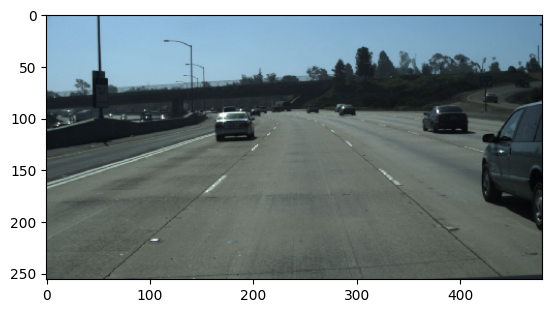

In [51]:
plt.imshow(picture)

<h2> Učitavanje i predviđanje regresijskog modela </h2>

In [46]:
model_noaug_170 = load_model("my_model170v1.h5", compile = False)

In [47]:
model_noaug_170_predictions = model_noaug_170.predict(train_dataset)

32/32 [==============================] - 21s 660ms/step


In [49]:
images_model_noaug_170 = prediction_images(model_noaug_170_predictions, train_dataset)

<h3> Prikaz predviđanja regresijskog modela </h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


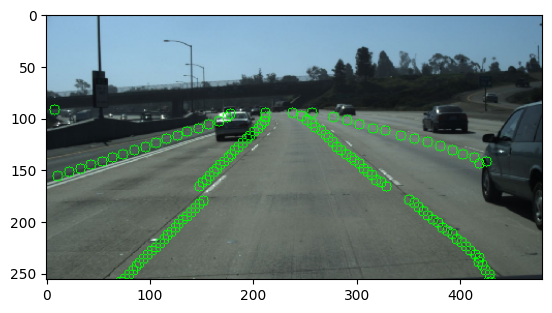

In [52]:
plt.imshow(images_model_noaug_170[t])

<h2> Učitavanje i predviđanje klasifikacijskog modela </h2>

In [ ]:
model_class = classification_model()

In [35]:
model_class.load_weights("model_all_classes_ckpt")

In [41]:
classes_predictions = model_class.predict(lane_dataset)

76/76 [==============================] - 41s 535ms/step


In [43]:
predictions = []
for i in classes_predictions:
    predictions.append(np.argmax(i) + 1)

<h3> Generiranje slika za svaku od traka </h3>

In [53]:
lane1 = generate_lane_img(picture, lane_points_1, t)
lane2 = generate_lane_img(picture, lane_points_2, t)
lane3 = generate_lane_img(picture, lane_points_3, t)
lane4 = generate_lane_img(picture, lane_points_4, t)

<h3> Prikaz svake trake i njene predikcije </h3>

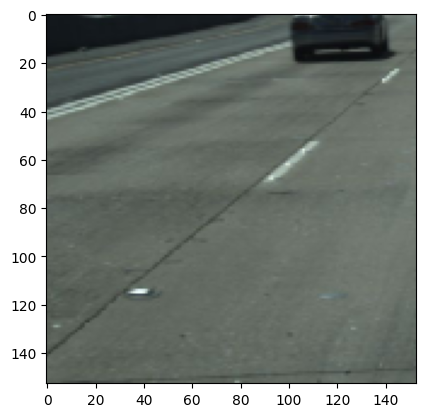

In [54]:
plt.imshow(lane1)

In [8]:
predictions(lane1)

Dashed


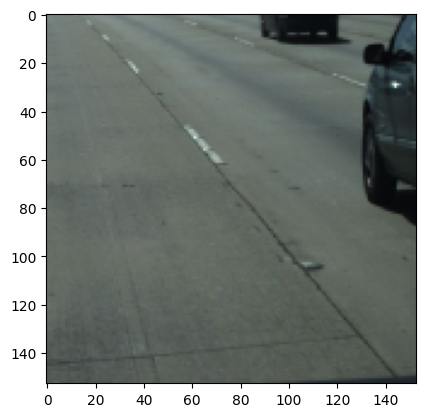

In [55]:
plt.imshow(lane2)

In [10]:
predictions(lane2)

Dashed


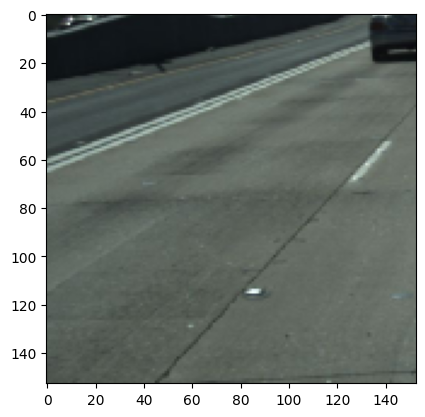

In [56]:
plt.imshow(lane3)

In [11]:
predictions(lane3)

Double Dashed


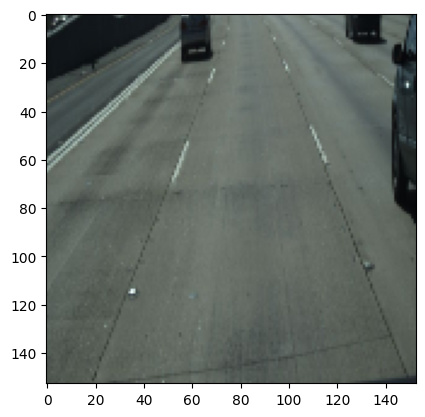

In [57]:
plt.imshow(lane4)

In [12]:
predictions(lane4)

Dashed
